In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from packaging import version
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit



In [43]:
path = 'dataset/1'

dfBikingRental = pd.read_csv(f'{path}/day.csv')

dfBikingRental.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [44]:
dfBikingRental[dfBikingRental['weathersit'] == 1]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,0.409708,0.666250,0.221404,433,5124,5557
718,719,2012-12-19,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787


In [ ]:
## mnth, weekday, workingday, weathersit, windspeed(media), atemp by Y cnt
dfBikingRental = dfBikingRental.sample(frac=1, random_state=42).reset_index(drop=True)

# Vamos a quitar los outliers entre 0.5 y 0.95
qM = dfBikingRental["cnt"].quantile(0.95)
dfBikingRental = dfBikingRental[dfBikingRental["cnt"] < qM]
qm = dfBikingRental["cnt"].quantile(0.05)
dfBikingRental = dfBikingRental[dfBikingRental["cnt"] > qm]


X = dfBikingRental[["mnth", "holiday", "yr", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed"]].values #características
y = dfBikingRental["cnt"].values  # etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)



<code>sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]</code>

Mean Squared Error: 872075.6552698606
Root Mean Squared Error: 933.8499104619867
R2 Score: 0.7018217893724044
La prediccion  tiene un fallo  Cuadrático de : 933.85  


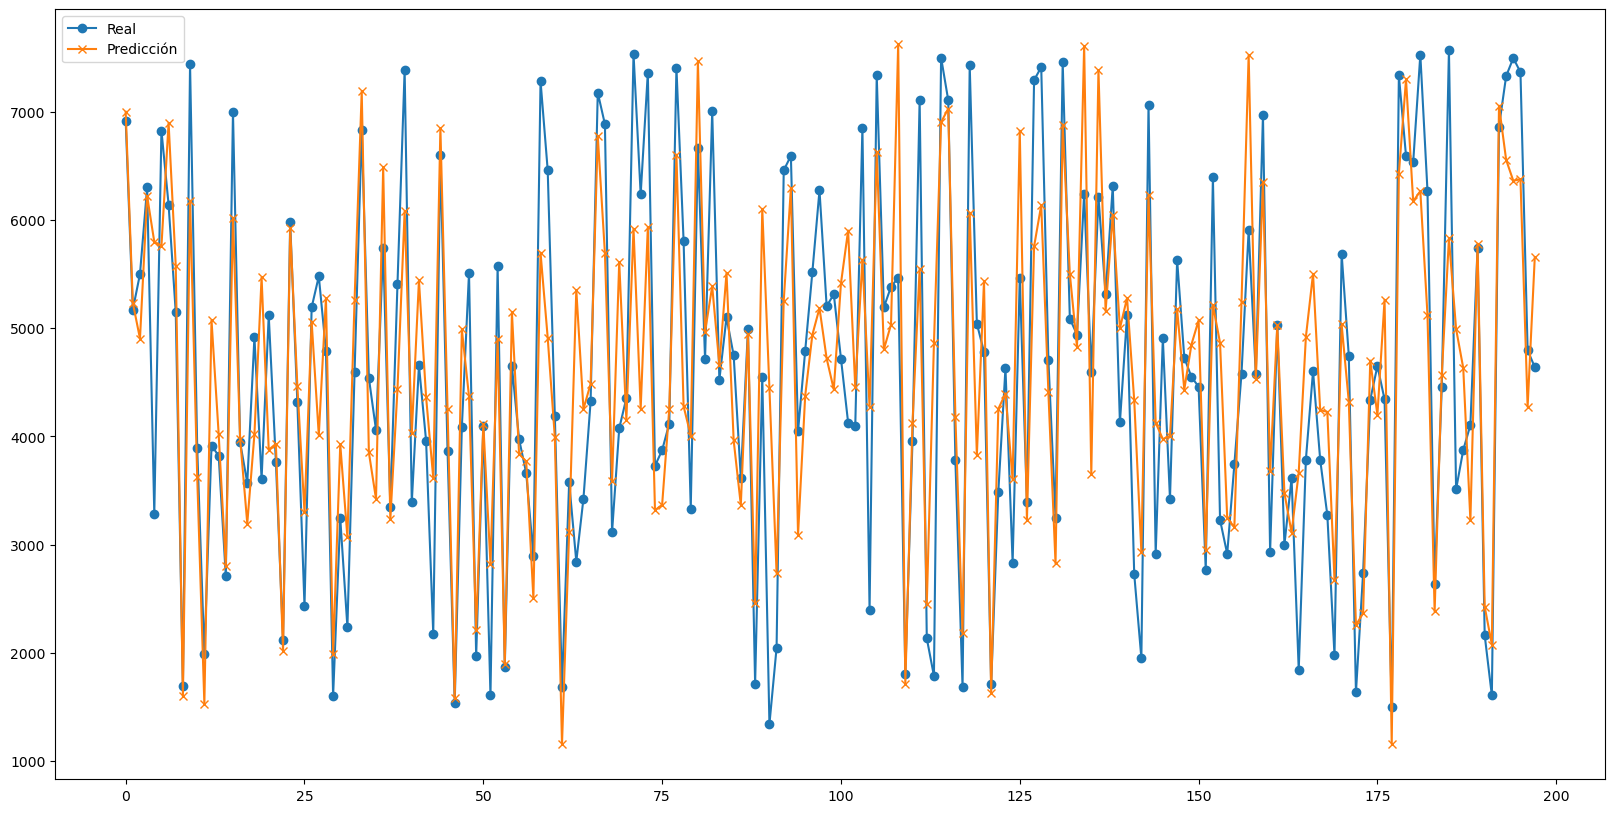

In [46]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print ("Mean Squared Error:", mse)
print ("Root Mean Squared Error:", rmse)
print ("R2 Score:", r2)

print(f'La prediccion  tiene un fallo  Cuadrático de : {rmse:.2f}  ')

# Creamos un dataframe que cotenga todos los datos de test y las predicciones
df = pd.DataFrame({
    'mnth': X_test[:, 0].flatten(),
    'holiday': X_test[:, 1].flatten(),
    'yr': X_test[:, 2].flatten(),
    'weekday': X_test[:, 3].flatten(),
    'workingday': X_test[:, 4].flatten(),
    'weathersit': X_test[:, 5].flatten(),
    'temp': X_test[:, 6].flatten(),
    'hum': X_test[:, 7].flatten(),
    'windspeed': X_test[:, 8].flatten(),
    'Real': y_test.flatten(),
    'Prediccion': y_pred.flatten()
})

# Grafica de puntos con una linea de regresion lineal para indicar el margen de error
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Real'], label='Real', marker='o')
plt.plot(df.index, df['Prediccion'], label='Predicción', marker='x')
plt.legend()
plt.show()

In [47]:
df.tail(50)


,mnth,holiday,yr,weekday,workingday,weathersit,temp,hum,windspeed,Real,Prediccion
148,9.0,0.0,0.0,5.0,1.0,2.0,0.643333,0.727083,0.139929,4727,4431.261552
149,6.0,0.0,0.0,1.0,1.0,1.0,0.678333,0.600000,0.121896,4548,4848.019707
150,7.0,0.0,1.0,6.0,0.0,3.0,0.595833,0.865417,0.213300,4459,5070.866687
151,11.0,0.0,0.0,1.0,1.0,3.0,0.447500,0.910000,0.138054,2765,2946.470218
152,10.0,0.0,1.0,2.0,1.0,2.0,0.446667,0.761667,0.190300,6392,5213.941395
153,12.0,0.0,1.0,0.0,0.0,2.0,0.384167,0.905417,0.157975,3228,4863.638860
154,11.0,0.0,0.0,2.0,1.0,2.0,0.458333,0.830833,0.258092,2914,3248.304740
155,12.0,0.0,0.0,3.0,1.0,2.0,0.317500,0.663750,0.060958,3740,3159.776068
156,2.0,0.0,1.0,3.0,1.0,1.0,0.469167,0.507917,0.189067,4579,5238.301384
157,6.0,0.0,1.0,4.0,1.0,1.0,0.805833,0.567917,0.118787,5905,7522.115521
